In [5]:
from textblob import TextBlob
# use the textblob module to make a function called stringToSentiment that returns a sentences sentiment 
def stringToSentiment(text): 
    return TextBlob(text).sentiment.polarity 

In [6]:
stringToSentiment('i hate you') 
-0.8 
 
stringToSentiment('i love you') 
0.5 
 
stringToSentiment('i see you') 
0.0 

0.0

In [7]:
# read in tweets data into a dataframe 
from textblob import TextBlob 
import pandas as pd 
%matplotlib inline 
# these tweets are from last May and are about Apple (AAPL) 
tweets = pd.read_csv('so_many_tweets.csv') 
tweets.head() 

,Text,Date,Status,Retweet
0,RT @j_o_h_n_danger: $TWTR now top holding for ...,2015-05-24 03:46:08,602319644234395648,6.022899e+17
1,RT diggingplatinum RT WWalkerWW: iOS 9 vs. And...,2015-05-24 04:17:42,602327586983796737,NaN
2,RT bosocial RT insidermonkey RT j_o_h_n_danger...,2015-05-24 04:13:22,602326499534966784,NaN
3,RT @WWalkerWW: iOS 9 vs. Android M – The New F...,2015-05-24 04:08:34,602325288740114432,6.023104e+17
4,RT @seeitmarket: Apple Chart Update: Big Test ...,2015-05-24 04:04:42,602324318903771136,6.023215e+17


In [8]:
tweets.shape 

(52512, 4)

In [9]:
# create a new column in tweets called sentiment that maps stringToSentiment to the text column 
tweets['sentiment'] = tweets['Text'].apply(stringToSentiment) 
 
tweets.head() 

,Text,Date,Status,Retweet,sentiment
0,RT @j_o_h_n_danger: $TWTR now top holding for ...,2015-05-24 03:46:08,602319644234395648,6.022899e+17,0.500000
1,RT diggingplatinum RT WWalkerWW: iOS 9 vs. And...,2015-05-24 04:17:42,602327586983796737,NaN,0.136364
2,RT bosocial RT insidermonkey RT j_o_h_n_danger...,2015-05-24 04:13:22,602326499534966784,NaN,0.500000
3,RT @WWalkerWW: iOS 9 vs. Android M – The New F...,2015-05-24 04:08:34,602325288740114432,6.023104e+17,0.136364
4,RT @seeitmarket: Apple Chart Update: Big Test ...,2015-05-24 04:04:42,602324318903771136,6.023215e+17,0.000000


In [10]:
import pandas as pd
tweets.index = pd.RangeIndex(start=0, stop=52512, step=1)  
# As a list, we can splice it 
list(tweets.index)[:5] 

[0, 1, 2, 3, 4]

In [11]:
# cast the date column as a datetime 
tweets['Date'] = pd.to_datetime(tweets.Date) 
tweets['Date'].head() 

0   2015-05-24 03:46:08
1   2015-05-24 04:17:42
2   2015-05-24 04:13:22
3   2015-05-24 04:08:34
4   2015-05-24 04:04:42
Name: Date, dtype: datetime64[ns]

In [16]:
tweets.index = tweets.Date 
tweets.index 



DatetimeIndex(['2015-05-24 03:46:08', '2015-05-24 04:17:42',
               '2015-05-24 04:13:22', '2015-05-24 04:08:34',
               '2015-05-24 04:04:42', '2015-05-24 04:00:01',
               '2015-05-24 03:54:07', '2015-05-24 04:25:29',
               '2015-05-24 04:24:47', '2015-05-24 04:06:42',
               ...
               '2015-05-02 16:30:02', '2015-05-02 16:29:35',
               '2015-05-02 16:28:26', '2015-05-02 16:27:53',
               '2015-05-02 16:27:02', '2015-05-02 16:26:39',
               '2015-05-02 16:25:00', '2015-05-02 16:23:39',
               '2015-05-02 16:23:38', '2015-05-02 16:23:21'],
              dtype='datetime64[ns]', name='Date', length=52512, freq=None)

In [17]:
tweets.head() 

,Text,Date,Status,Retweet,sentiment
Date,,,,,
2015-05-24 03:46:08,RT @j_o_h_n_danger: $TWTR now top holding for ...,2015-05-24 03:46:08,602319644234395648,6.022899e+17,0.500000
2015-05-24 04:17:42,RT diggingplatinum RT WWalkerWW: iOS 9 vs. And...,2015-05-24 04:17:42,602327586983796737,NaN,0.136364
2015-05-24 04:13:22,RT bosocial RT insidermonkey RT j_o_h_n_danger...,2015-05-24 04:13:22,602326499534966784,NaN,0.500000
2015-05-24 04:08:34,RT @WWalkerWW: iOS 9 vs. Android M – The New F...,2015-05-24 04:08:34,602325288740114432,6.023104e+17,0.136364
2015-05-24 04:04:42,RT @seeitmarket: Apple Chart Update: Big Test ...,2015-05-24 04:04:42,602324318903771136,6.023215e+17,0.000000


In [18]:
# create a dataframe called daily_tweets which resamples tweets by D, averaging the columns 
daily_tweets = tweets[['sentiment']].resample('D', how='mean') 
# I only want the sentiment column in my new Dataframe. 
daily_tweets.head()

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


,sentiment
Date,
2015-05-02,0.083031
2015-05-03,0.107045
2015-05-04,0.084062
2015-05-05,0.063895
2015-05-06,0.067004


In [19]:
daily_tweets.shape

(23, 1)

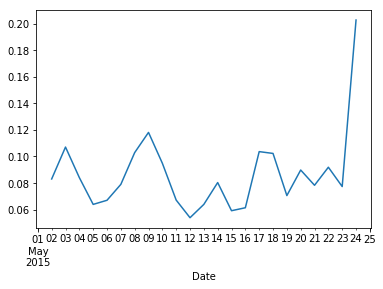

In [20]:
# plot the sentiment as a line graph 
daily_tweets.sentiment.plot(kind='line') 

In [56]:
import pandas as pd
import pandas_datareader as pdr
import datetime 
historical_prices = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2015, 5, 2), 
                          end=datetime.datetime(2015, 5, 25))


prices = pd.DataFrame(historical_prices) 
 
prices.head() 


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-04,130.570007,128.259995,129.500000,128.699997,50988300.0,120.922684
2015-05-05,128.449997,125.779999,128.149994,125.800003,49271400.0,118.197945
2015-05-06,126.750000,123.360001,126.559998,125.010002,72141000.0,117.455666
2015-05-07,126.080002,124.019997,124.769997,125.260002,43940900.0,118.182167
2015-05-08,127.620003,126.110001,126.680000,127.620003,55550400.0,120.408821


In [57]:
 
prices.info() #the columns aren't numbers! 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2015-05-04 to 2015-05-26
Data columns (total 6 columns):
High         16 non-null float64
Low          16 non-null float64
Open         16 non-null float64
Close        16 non-null float64
Volume       16 non-null float64
Adj Close    16 non-null float64
dtypes: float64(6)
memory usage: 896.0 bytes


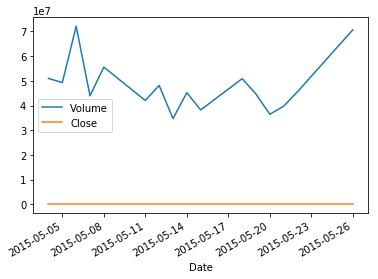

In [58]:
# plot both volume and close as line graphs in the same graph, what do you notice is the problem? 
prices[["Volume", 'Close']].plot()

In [59]:
prices[["Volume", 'Close']].describe()

,Volume,Close
count,1.600000e+01,16.000000
mean,4.801178e+07,128.261250
std,1.072519e+07,2.333773
min,3.469420e+07,125.010002
25%,4.145945e+07,125.975002
50%,4.539975e+07,128.735001
75%,5.090925e+07,130.062500
max,7.214100e+07,132.539993


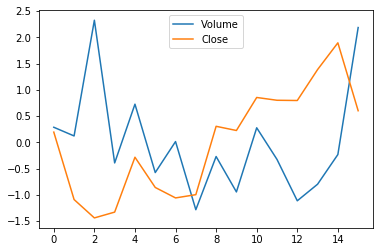

In [61]:
from sklearn.preprocessing import StandardScaler
# scale the columns by z scores using StandardScaler 
# Then plot the scaled data 
s = StandardScaler() 
only_prices_and_volumes = prices[["Volume", 'Close']] 
price_volume_scaled = s.fit_transform(only_prices_and_volumes) 
pd.DataFrame(price_volume_scaled, columns=["Volume", 'Close']).plot() 

In [62]:
# concatinate prices.Close, and daily_tweets.sentiment 
 
merged = pd.concat([prices.Close, daily_tweets.sentiment], axis=1) 
merged.head() 

,Close,sentiment
Date,,
2015-05-02,NaN,0.083031
2015-05-03,NaN,0.107045
2015-05-04,128.699997,0.084062
2015-05-05,125.800003,0.063895
2015-05-06,125.010002,0.067004


In [63]:
# Delete any rows with missing values in any column 
merged.dropna(inplace=True) 

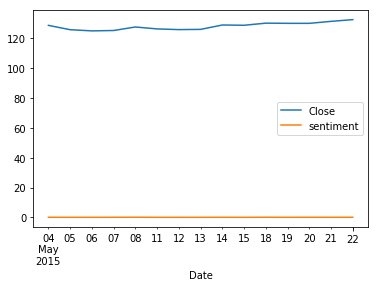

In [64]:
merged.plot() 
# wow that looks awful 

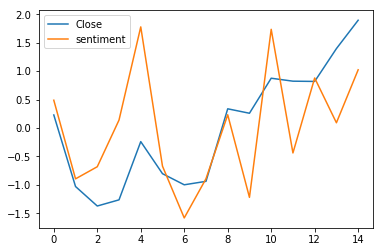

In [65]:
# scale the columns by z scores using StandardScaler 
from sklearn.preprocessing import StandardScaler 
s = StandardScaler() 
merged_scaled = s.fit_transform(merged) 
 
pd.DataFrame(merged_scaled, columns=merged.columns).plot() 
# notice how sentiment seems to follow the closing price 
 

In [66]:
# Shift the sentiment column backwards one item 
 
merged['yesterday_sentiment'] = merged['sentiment'].shift(1) 
merged.head() 

,Close,sentiment,yesterday_sentiment
Date,,,
2015-05-04,128.699997,0.084062,NaN
2015-05-05,125.800003,0.063895,0.084062
2015-05-06,125.010002,0.067004,0.063895
2015-05-07,125.260002,0.078972,0.067004
2015-05-08,127.620003,0.102869,0.078972


In [67]:
# Make a new dataframe for our regression and drop the null values 
 
regression_df = merged[['yesterday_sentiment', 'Close']] 
regression_df.dropna(inplace=True) 
regression_df.head() 

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,yesterday_sentiment,Close
Date,,
2015-05-05,0.084062,125.800003
2015-05-06,0.063895,125.010002
2015-05-07,0.067004,125.260002
2015-05-08,0.078972,127.620003
2015-05-11,0.102869,126.320000


In [68]:
# Imports for our regression 
 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.cross_validation import cross_val_score 
import numpy as np 

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [69]:
# Our RMSE as a result of cross validation linear regression 
 
linreg = LinearRegression() 
rmse_cv = np.sqrt(abs(cross_val_score(linreg, regression_df[['yesterday_sentiment']], regression_df['Close'], cv=3, scoring='mean_squared_error').mean())) 
rmse_cv 
 
3.49837 
 
# Our RMSE as a result of cross validation random forest 
 
rf = RandomForestRegressor() 
rmse_cv = np.sqrt(abs(cross_val_score(rf, regression_df[['yesterday_sentiment']], regression_df['Close'], cv=3, scoring='mean_squared_error').mean())) 
rmse_cv 
 
3.30603 

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in v

3.30603

In [70]:
regression_df['Close'].describe() 

count     14.000000
mean     128.132858
std        2.471810
min      125.010002
25%      125.905003
50%      128.195004
75%      130.067505
max      132.539993
Name: Close, dtype: float64

In [71]:
# null model for regression 
mean_close = regression_df['Close'].mean() 
preds = [mean_close]*regression_df.shape[0] 
preds 
from sklearn.metrics import mean_squared_error 
null_rmse = np.sqrt(mean_squared_error(preds, regression_df['Close'])) 
null_rmse 

2.381895837988644

In [72]:
# Imports for our classification 
 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score 
import numpy as np 
 
 
 
# Make a new dataframe for our classification and drop the null values 
 
classification_df = merged[['yesterday_sentiment', 'Close']] 
 
# variable to represent yesterday's closing price 
classification_df['yesterday_close'] = classification_df['Close'].shift(1) 
 
 
# column that represents the precent change in price since yesterday 
classification_df['percent_change_in_price'] = (classification_df['Close']-classification_df['yesterday_close']) / classification_df['yesterday_close'] 
 
 
# drop any null values 
classification_df.dropna(inplace=True) 
classification_df.head() 
 
 
# Our new classification response 
 
classification_df['change_close_big_deal'] = abs(classification_df['percent_change_in_price'] ) > .01 
classification_df.head() 

,yesterday_sentiment,Close,yesterday_close,percent_change_in_price,change_close_big_deal
Date,,,,,
2015-05-05,0.084062,125.800003,128.699997,-0.022533,True
2015-05-06,0.063895,125.010002,125.800003,-0.006280,False
2015-05-07,0.067004,125.260002,125.010002,0.002000,False
2015-05-08,0.078972,127.620003,125.260002,0.018841,True
2015-05-11,0.102869,126.320000,127.620003,-0.010187,True


In [73]:
# Our accuracy as a result of cross validation random forest 
 
rf = RandomForestClassifier() 
accuracy_cv = cross_val_score(rf, classification_df[['yesterday_sentiment']], classification_df['change_close_big_deal'], cv=3, scoring='accuracy').mean() 
 
accuracy_cv 
 
0.1777777 

0.1777777

In [74]:
# Our accuracy as a result of cross validation logistic regression 
 
logreg = LogisticRegression() 
accuracy_cv = cross_val_score(logreg, classification_df[['yesterday_sentiment']], classification_df['change_close_big_deal'], cv=3, scoring='accuracy').mean() 
 
accuracy_cv 
 
0.5888 

0.5888

In [75]:
# null model for classification 
null_accuracy = 1 - classification_df['change_close_big_deal'].mean() 
 
null_accuracy 
 
0.5833333 

0.5833333

In [76]:
# Using dataset of a 1978 survey conducted to measure likliehood of women to perform extramarital affairs 
# http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html 
 
import statsmodels.api as sm 
affairs_df = sm.datasets.fair.load_pandas().data 
affairs_df.head() 
 


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [77]:
# Create a categorical variable 
 
affairs_df['affair_binary'] = (affairs_df['affairs'] > 0)

In [78]:
# find linear correlations between variables and affair_binary 
affairs_df.corr() 

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_binary
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614,0.017637
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.464046
affair_binary,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,0.464046,1.000000


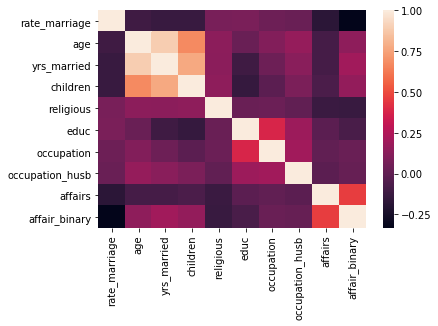

In [79]:
import seaborn as sns 
sns.heatmap(affairs_df.corr()) 

In [81]:
affairs_X = affairs_df.drop(['affairs', 'affair_binary'], axis=1)  
# data without the affairs or affair_binary column 
 
affairs_y = affairs_df['affair_binary'] 

In [83]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()  
# instantiate the model 
 
from sklearn.cross_validation import cross_val_score 
# import our cross validation module 
 
# check the accuracy on the training set 
scores = cross_val_score(model, affairs_X, affairs_y, cv=10) 
 
print( scores.mean(), "average accuracy" )
#0.659756806845 average accuracy 
 
 
print( scores.std(), "standard deviation") # very low, meaning variance of the model is low 
#0.0204081732291 standard deviation 
 
# Looks ok on the cross validation side 

0.6594413556515053 average accuracy
0.020721711520752133 standard deviation


In [84]:
# Explore individual features that make the biggest impact 
# rate_marriage, yrs_married, and occupation_husb. But one of these variables doesn't quite make sense right? 
# Its the occupation variable, because they are nominal, their interpretations 
model.fit(affairs_X, affairs_y) 
pd.DataFrame({'feature':affairs_X.columns, 'importance':model.feature_importances_}).sort_values('importance').tail(3) 
 

,feature,importance
2,yrs_married,0.137386
0,rate_marriage,0.140575
7,occupation_husb,0.176033


In [85]:
# Dummy Variables: 
 
# Encoding qualitiative (nominal) data using separate columns (see slides for linear regression for more) 
 
occuptation_dummies = pd.get_dummies(affairs_df['occupation'], prefix='occ_').iloc[:, 1:] 
 
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns) 
affairs_df = pd.concat([affairs_df, occuptation_dummies], axis=1) 
affairs_df.head() 

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_binary,occ__2.0,occ__3.0,occ__4.0,occ__5.0,occ__6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,True,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,True,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,True,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,True,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,True,0,1,0,0,0


In [86]:
# Now for the husband's job 
 
occuptation_dummies = pd.get_dummies(affairs_df['occupation_husb'], prefix='occ_husb_').iloc[:, 1:] 
 
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns) 
affairs_df = pd.concat([affairs_df, occuptation_dummies], axis=1) 
affairs_df.head() 
 
(6366, 15) 

(6366, 15)

In [87]:
# remove appropiate columns for feature set affairs_X = affairs_df.drop(['affairs', 'affair_binary', 'occupation', 'occupation_husb'], axis=1) affairs_y = affairs_df['affair_binary'] model = DecisionTreeClassifier() from sklearn.cross_validation import cross_val_score # check the accuracy on the training set scores = cross_val_score(model, affairs_X, affairs_y, cv=10) print scores.mean(), "average accuracy" 

print (scores.std(), "standard deviation") # very low, meaning variance of the model is low # Still looks ok # Explore individual features that make the biggest impact model.fit(affairs_X, affairs_y) 

pd.DataFrame({'feature':affairs_X.columns, 'importance':model.feature_importances_}).sort_values('importance').tail(10) 


0.020721711520752133 standard deviation


,feature,importance
4,religious,0.088860
6,occupation,0.095584
1,age,0.110174
5,educ,0.121620
3,children,0.129768
2,yrs_married,0.137386
0,rate_marriage,0.140575
7,occupation_husb,0.176033


In [ ]:
-------TensorFlow-------

In [1]:
from sklearn import datasets, metrics 
import tensorflow as tf 
import numpy as np 
from sklearn.cross_validation import train_test_split 
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Our data set of iris flowers 
iris = datasets.load_iris() 
 
# Load datasets and split them for training and testing 
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target) 
 
 
####### TENSORFLOW ####### 
 
# Here is tensorflow's syntax for defining features. 
# We must specify that all features have real-value data 
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)] 
# notice the dimension is set to four because we have four columns 
 
# We set our "learning rate" which is a decimal that tells the network  
# how quickly to learn 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1) 
# A learning rate closer to 0 means the network will learn slower 
 
 
# Build a linear classifier (logistic regression) 
# note we have to tell tensorflow the number of classes we are looking for 
# which are 3 classes of iris 
classifier = tf.contrib.learn.LinearClassifier(feature_columns=feature_columns, 
                                              optimizer=optimizer, 
                                                      n_classes=3) 
 
# Fit model. Uses error optimization techniques like stochastic gradient descent 
classifier.fit(x=X_train, 
               y=y_train, 
               steps=1000)  # number of iterations 


Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc6ecab4f98>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7fc6eefb7cf8>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7fc6eefb7fd0>, 'gradient_clip_norm': None, 'joint_weights': False})

In [4]:
# Evaluate accuracy. 
accuracy_score = classifier.evaluate(x=X_test, 
                                     y=y_test)["accuracy"] 
 
print('Accuracy: {0:f}'.format(accuracy_score)) 


INFO:tensorflow:Starting evaluation at 2018-10-28-20:23:18
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpiwr2tuww/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-28-20:23:18
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.94736844, global_step = 1000, loss = 0.13800518
Accuracy: 0.947368


In [6]:
# Classify two new flower samples. 
new_samples = np.array( 
    [[6.4, 3.2, 4.5, 1.5], [5.8, 3.1, 5.0, 1.7]], dtype=float) 
 
y = classifier.predict(new_samples) 
print('Predictions: {}'.format(str(y))) 


Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpiwr2tuww/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predictions: <generator object _as_iterable at 0x7fc6ebacfaf0>


In [7]:
from sklearn.linear_model import LogisticRegression 
# compare our result above to a simple scikit-learn logistic regression 
 
logreg = LogisticRegression() 
# instantiate the model 
 
logreg.fit(X_train, y_train) 
# fit it to our training set 
 
y_predicted = logreg.predict(X_test) 
# predict on our test set, to avoid overfitting! 
 
 
accuracy = metrics.accuracy_score(y_predicted, y_test) 
# get our accuracy score 
 
accuracy 

0.9736842105263158

In [8]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)] 
 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1) 
 
classifier = tf.contrib.learn.LinearClassifier(feature_columns=feature_columns, 
                                               optimizer=optimizer, 
                                            n_classes=3) 
 
classifier.fit(x=X_train, 
               y=y_train, 
               steps=2000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc6e8a620f0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpu650cvpb'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpu650cvpb/mo

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7fc6e8a4ff60>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7fc6e8a4ff28>, 'gradient_clip_norm': None, 'joint_weights': False})

In [9]:
# Evaluate accuracy. 
accuracy_score = classifier.evaluate(x=X_test, 
                                     y=y_test)["accuracy"] 
 
 
print('Accuracy: {0:f}'.format(accuracy_score)) 

INFO:tensorflow:Starting evaluation at 2018-10-28-20:26:23
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpu650cvpb/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-28-20:26:24
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.94736844, global_step = 2000, loss = 0.11092094
Accuracy: 0.947368


In [10]:
# Specify that all features have real-value data 
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)] 
 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1) 
 
 
# Build 3 layer DNN with 10, 20, 10 units respectively. 
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, 
                                        hidden_units=[10, 20, 10], 
                                        optimizer=optimizer, 
                                        n_classes=3) 
 
# Fit model. 
classifier.fit(x=X_train, 
               y=y_train, 
               steps=2000) 


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc6e8ff0cf8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpmotjpnth'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpmotjpnth/mo

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7fc6e8ff0a20>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7fc6e8ff09e8>, 'activation_fn': <function relu at 0x7fc6f457d510>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [11]:
tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, 
                                     hidden_units=[10, 20, 10], 
                                     optimizer=optimizer, 
                                     n_classes=3) 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc6e8ff0668>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp7n6mu5s4'}


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7fc6e8a4fdd8>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7fc6e8ff09e8>, 'activation_fn': <function relu at 0x7fc6f457d510>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [12]:
from tensorflow.examples.tutorials.mnist import input_data 
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False) 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
x_mnist = mnist.train.images 
y_mnist = mnist.train.labels.astype(int) 

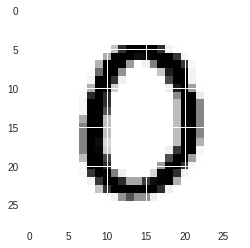

In [14]:
import matplotlib.pyplot as plt 
plt.imshow(x_mnist[10].reshape(28, 28)) 

In [15]:
y_mnist[10] 

0

In [16]:
x_mnist.shape 

 
y_mnist.shape 


(55000,)

In [17]:
# Specify that all features have real-value data 
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=784)] 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1) 
 
 
# Build 3 layer DNN with 10, 20, 10 units respectively. 
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, 
                                     hidden_units=[10, 20, 10], 
                                           optimizer=optimizer, 
                                                  n_classes=10) 
 
# Fit model. 
classifier.fit(x=x_mnist, 
               y=y_mnist, 
               steps=1000) 
# Warning this is veryyyyyyyy slow 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc6e7dad9e8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp49cjc3yk'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp49cjc3yk/mo

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7fc6e7dad940>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7fc6e7dadfd0>, 'activation_fn': <function relu at 0x7fc6f457d510>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [18]:
x_mnist_test = mnist.test.images 
y_mnist_test = mnist.test.labels.astype(int) 
 
x_mnist_test.shape 

 
 
y_mnist_test.shape 


(10000,)

In [20]:
# Evaluate accuracy. 
accuracy_score = classifier.evaluate(x=x_mnist_test, 
                                     y=y_mnist_test)["accuracy"] 
print('Accuracy: {0:f}'.format(accuracy_score)) 
logreg = LogisticRegression() 
logreg.fit(x_mnist, y_mnist) 
# Warning this is slow 
 
y_predicted = logreg.predict(x_mnist_test) 
from sklearn.metrics import accuracy_score 
# predict on our test set, to avoid overfitting! 
 
accuracy = accuracy_score(y_predicted, y_mnist_test) 
# get our accuracy score 

INFO:tensorflow:Starting evaluation at 2018-10-28-20:38:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp49cjc3yk/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-28-20:38:36
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.9225, global_step = 1000, loss = 0.2608437
Accuracy: 0.922500


In [21]:
# A wider network 
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=784)] 
 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1) 
 
 
# Build 3 layer DNN with 10, 20, 10 units respectively. 
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, 
                                     hidden_units=[1500], 
                                     optimizer=optimizer, 
                                            n_classes=10) 
 
# Fit model. 
classifier.fit(x=x_mnist, 
               y=y_mnist, 
               steps=100) 
# Warning this is veryyyyyyyy slow 
# Evaluate accuracy. 
accuracy_score = classifier.evaluate(x=x_mnist_test, 
                                     y=y_mnist_test)["accuracy"] 
print('Accuracy: {0:f}'.format(accuracy_score)) 


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc6de834ef0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpg_0apoy7'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpg_0apoy7/mo